In [3]:
!pip install kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"soumyabhuyan","key":"e58a646f734c00c748e8e29281f3c99c"}'}

In [5]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 94% 153M/163M [00:01<00:00, 153MB/s]
100% 163M/163M [00:01<00:00, 152MB/s]


In [7]:
#extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [8]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [9]:
import os  # Importing the OS module for operating system-related functions
import numpy as np  # Importing NumPy for numerical operations and array handling
import matplotlib.pyplot as plt  # Importing Matplotlib for data visualization
import matplotlib.image as mpimg  # Importing specific modules from Matplotlib for image operations
import cv2  # Importing OpenCV, a library mainly aimed at real-time computer vision
from google.colab.patches import cv2_imshow  # Importing a function to display images in Google Colab
from PIL import Image  # Importing the Python Imaging Library (PIL) for image processing
from sklearn.model_selection import train_test_split  # Importing a function for splitting data into training and test sets


In [10]:
with_mask_files = os.listdir('/content/data/with_mask')

In [11]:
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1473.jpg', 'with_mask_1377.jpg', 'with_mask_73.jpg', 'with_mask_53.jpg', 'with_mask_2954.jpg']
['with_mask_259.jpg', 'with_mask_741.jpg', 'with_mask_2130.jpg', 'with_mask_2544.jpg', 'with_mask_1863.jpg']


In [12]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1920.jpg', 'without_mask_1720.jpg', 'without_mask_3018.jpg', 'without_mask_3326.jpg', 'without_mask_3803.jpg']
['without_mask_1424.jpg', 'without_mask_1414.jpg', 'without_mask_1940.jpg', 'without_mask_3654.jpg', 'without_mask_3225.jpg']


In [13]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask: 1

without mask: 0




In [14]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [15]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [16]:
#combine two list
labels = with_mask_labels + without_mask_labels

print(len(labels))

7553


**Displaying the Images**

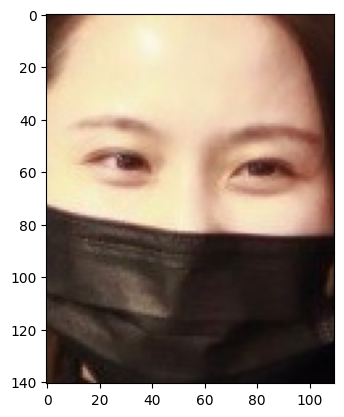

In [17]:
#displaying with mask image
img =  mpimg.imread('/content/data/with_mask/with_mask_1377.jpg')
imgplot = plt.imshow(img)

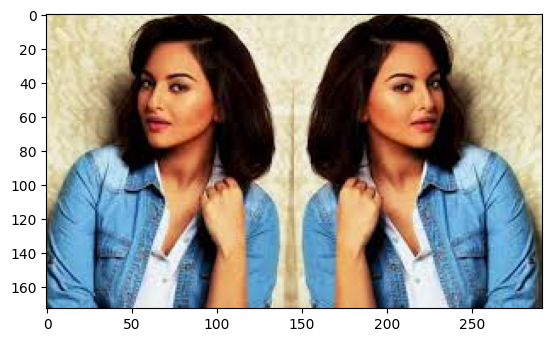

In [18]:
img = mpimg.imread('/content/data/without_mask/without_mask_1720.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [19]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [20]:
 type(data)

list

In [21]:
len(data)

7553

In [22]:
data[0]

array([[[192, 163, 155],
        [178, 149, 139],
        [158, 126, 115],
        ...,
        [175, 141, 137],
        [166, 133, 131],
        [155, 125, 123]],

       [[186, 156, 146],
        [176, 145, 134],
        [154, 120, 106],
        ...,
        [178, 145, 139],
        [173, 141, 136],
        [170, 139, 137]],

       [[183, 149, 136],
        [168, 133, 119],
        [151, 114,  98],
        ...,
        [173, 140, 134],
        [178, 146, 140],
        [176, 145, 143]],

       ...,

       [[204, 160, 133],
        [202, 158, 130],
        [199, 155, 126],
        ...,
        [164, 150, 150],
        [104,  90,  91],
        [ 64,  48,  52]],

       [[203, 158, 129],
        [200, 157, 126],
        [197, 154, 122],
        ...,
        [129, 115, 115],
        [ 72,  58,  59],
        [ 44,  33,  35]],

       [[200, 155, 124],
        [197, 152, 121],
        [194, 150, 117],
        ...,
        [ 82,  67,  67],
        [ 64,  51,  51],
        [ 52,  40,  42]]

In [23]:
type(data[0])


numpy.ndarray

In [24]:
data[0].shape

(128, 128, 3)

In [25]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [26]:
type(X)

numpy.ndarray

In [27]:
type(Y)

numpy.ndarray

In [28]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [29]:
print(Y)



[1 1 1 ... 0 0 0]


**Training**

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [31]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [32]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [33]:
X_train[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [34]:
X_train_scaled[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

**Building a Convolutional Neural Networks (CNN)**

In [35]:
import tensorflow as tf
from tensorflow import keras

In [37]:
num_of_classes = 2  # Number of classes in the classification task (in this case, 2 classes)

model = keras.Sequential()  # Initializing a sequential model using Keras

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
# Adding a 2D convolutional layer with 32 filters, each of size 3x3, using ReLU activation,
# and specifying the input shape of images as 128x128 pixels with 3 color channels (RGB)

model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
# Adding a max-pooling layer with a pool size of 2x2 to downsample the features

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
# Adding another 2D convolutional layer with 64 filters, each of size 3x3, using ReLU activation

model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
# Adding another max-pooling layer with a pool size of 2x2 to downsample the features further

model.add(keras.layers.Flatten())  # Flattening the output from the previous layers

model.add(keras.layers.Dense(128, activation='relu'))
# Adding a densely connected layer with 128 units and ReLU activation

model.add(keras.layers.Dropout(0.5))
# Adding a dropout layer to prevent overfitting, dropping out 50% of the neurons during training

model.add(keras.layers.Dense(64, activation='relu'))
# Adding another densely connected layer with 64 units and ReLU activation

model.add(keras.layers.Dropout(0.5))
# Adding another dropout layer to further prevent overfitting

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))
# Adding the output layer


In [38]:
model.compile(
    optimizer='adam',  # Optimizer used for updating the weights of the neural network. 'Adam' is an adaptive learning rate optimization algorithm.
    loss='sparse_categorical_crossentropy',  # Loss function used to measure the error between predicted and true labels. 'Sparse_categorical_crossentropy' is used for integer-encoded labels.
    metrics=['acc']  # Evaluation metric used to assess the model's performance during training. 'Acc' represents accuracy, measuring the proportion of correctly classified samples.
)


In [39]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 17s 25ms/step - loss: 0.4649 - acc: 0.7979 - val_loss: 0.2802 - val_acc: 0.8744
Epoch 2/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2925 - acc: 0.8793 - val_loss: 0.2311 - val_acc: 0.9008
Epoch 3/5
170/170 [==============================] - 5s 27ms/step - loss: 0.2327 - acc: 0.9044 - val_loss: 0.2122 - val_acc: 0.9157
Epoch 4/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1980 - acc: 0.9268 - val_loss: 0.1986 - val_acc: 0.9223
Epoch 5/5
170/170 [==============================] - 3s 20ms/step - loss: 0.1687 - acc: 0.9386 - val_loss: 0.1904 - val_acc: 0.9256


**Model Evaluation**

In [40]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 10ms/step - loss: 0.2263 - acc: 0.9226
Test Accuracy = 0.9225678443908691


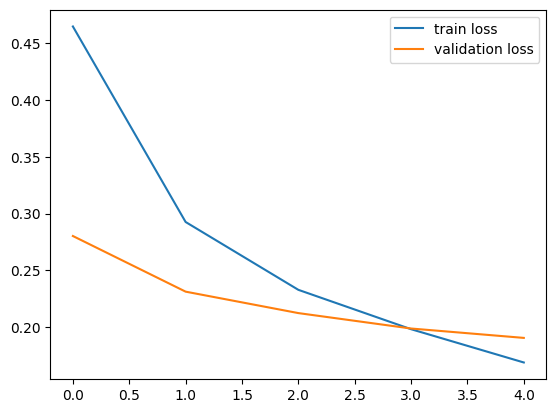

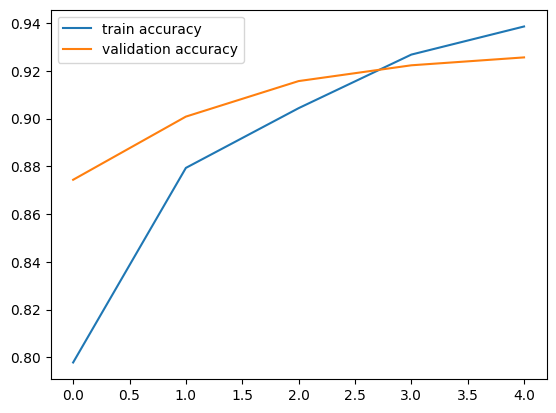

In [41]:
h = history  # Assigning the variable 'h' to the 'history' object (commonly used to store training history of a neural network)

# Plot the training and validation loss values
plt.plot(h.history['loss'], label='train loss')  # Plotting the training loss over epochs with label 'train loss'
plt.plot(h.history['val_loss'], label='validation loss')  # Plotting the validation loss over epochs with label 'validation loss'
plt.legend()  # Displaying the legend to distinguish between the training and validation loss
plt.show()  # Displaying the plot of loss values

# Plot the training and validation accuracy values
plt.plot(h.history['acc'], label='train accuracy')  # Plotting the training accuracy over epochs with label 'train accuracy'
plt.plot(h.history['val_acc'], label='validation accuracy')  # Plotting the validation accuracy over epochs with label 'validation accuracy'
plt.legend()  # Displaying the legend to distinguish between the training and validation accuracy
plt.show()  # Displaying the plot of accuracy values


Path of the image to be predicted: /content/data/with_mask/with_mask_1019.jpg


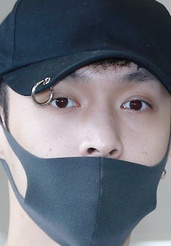

1/1 [==============================] - 0s 31ms/step
[[0.17672487 0.8451367 ]]
1
The person in the image is wearing a mask


In [44]:
input_image_path = input('Path of the image to be predicted: ')  # Takes user input for the image file path to be predicted

input_image = cv2.imread(input_image_path)  # Reads the image using OpenCV

cv2_imshow(input_image)  # Displays the input image using cv2_imshow, particularly in the Google Colab environment

input_image_resized = cv2.resize(input_image, (128, 128))  # Resizes the input image to 128x128 pixels

input_image_scaled = input_image_resized / 255  # Scales the pixel values of the resized image between 0 and 1

input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])  # Reshapes the image for model prediction

input_prediction = model.predict(input_image_reshaped)  # Uses the model to predict the class probabilities for the input image

print(input_prediction)  # Prints the predicted class probabilities

input_pred_label = np.argmax(input_prediction)  # Finds the index of the highest predicted probability

print(input_pred_label)  # Prints the predicted label based on the highest probability

if input_pred_label == 1:
    print('The person in the image is wearing a mask')  # Prints this message if the predicted label is 1 (mask class)
else:
    print('The person in the image is not wearing a mask')  # Prints this message if the predicted label is not 1 (non-mask class)


Path of the image to be predicted: /content/data/without_mask/without_mask_1003.jpg


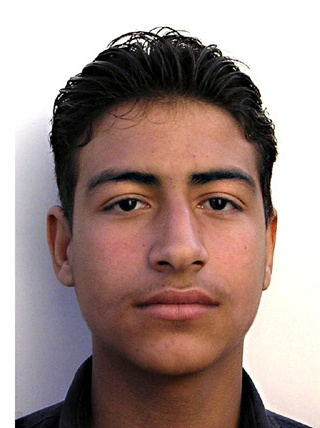

1/1 [==============================] - 0s 29ms/step
[[0.18456729 0.87674093]]
1
The person in the image is wearing a mask


In [46]:
input_image_path = input('Path of the image to be predicted: ')  # Takes user input for the image file path to be predicted

input_image = cv2.imread(input_image_path)  # Reads the image using OpenCV and stores it in the variable 'input_image'

cv2_imshow(input_image)  # Displays the input image using 'cv2_imshow', a function that can show images in Google Colab

input_image_resized = cv2.resize(input_image, (128,128))  # Resizes the input image to 128x128 pixels

input_image_scaled = input_image_resized / 255  # Scales the pixel values of the resized image between 0 and 1

input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])  # Reshapes the image for model input

input_prediction = model.predict(input_image_reshaped)  # Uses the model to predict probabilities for the input image

print(input_prediction)  # Displays the predicted probabilities for each class

input_pred_label = np.argmax(input_prediction)  # Determines the index of the highest predicted probability

print(input_pred_label)  # Displays the predicted label based on the highest probability

if input_pred_label == 1:  # Checks if the predicted label is 1 (assuming 1 represents 'wearing a mask')
    print('The person in the image is wearing a mask')  # Prints a message indicating the person is wearing a mask
else:
    print('The person in the image is not wearing a mask')  # Prints a message indicating the person is not wearing a mask


Project Overview: The face mask detection project employed Convolutional Neural Networks (CNNs) to discern individuals wearing masks from those without masks.


Data Preparation: Images of individuals with and without masks were collected and preprocessed, resizing and converting them into arrays for model training.


Model Development: A CNN model was designed and trained on the prepared dataset, leveraging layers for feature extraction and classification.


Training and Evaluation: The model was trained using the dataset, and its performance was evaluated based on accuracy and loss.

Prediction Process: Users could input an image for prediction. The model resized, scaled, and reshaped the image to make predictions.


Outcome: The model effectively determined whether a person in the image was wearing a mask or not, showcasing the potential of CNNs in real-world applications like automated face mask detection.



